In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/MARUTI.csv')

In [5]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4426 non-null   float64
 14  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 518.9

In [7]:
dataset_copy = dataset.copy()

# converting Date column into datetime data type
# extracting month, week and day (day of week)

dataset_copy['Date'] = dataset_copy['Date'].apply(pd.to_datetime)

dataset_copy['Month'] = dataset_copy.Date.dt.month
dataset_copy['Day'] = dataset_copy.Date.dt.day

dataset_copy.set_index('Date', drop=False, inplace=True)


In [8]:
dataset_copy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Day
Date,,,,,,,,,,,,,,,,,
2003-07-09,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428,7,9
2003-07-10,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170,7,10
2003-07-11,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568,7,11
2003-07-14,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258,7,14
2003-07-15,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118,7,15


In [9]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2003-07-09 to 2021-04-30
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4427 non-null   datetime64[ns]
 1   Symbol              4427 non-null   object        
 2   Series              4427 non-null   object        
 3   Prev Close          4427 non-null   float64       
 4   Open                4427 non-null   float64       
 5   High                4427 non-null   float64       
 6   Low                 4427 non-null   float64       
 7   Last                4427 non-null   float64       
 8   Close               4427 non-null   float64       
 9   VWAP                4427 non-null   float64       
 10  Volume              4427 non-null   int64         
 11  Turnover            4427 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4426 non-n

In [10]:
dataset_copy.drop(columns=['Symbol', 'Series', 'Last', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace=True)

In [11]:
dataset_copy.head()

,Date,Prev Close,Open,High,Low,Close,VWAP,Month,Day
Date,,,,,,,,,
2003-07-09,2003-07-09,125.00,164.90,170.40,155.00,164.30,165.95,7,9
2003-07-10,2003-07-10,164.30,167.00,168.70,164.50,167.00,166.74,7,10
2003-07-11,2003-07-11,167.00,167.75,174.85,166.25,173.35,172.45,7,11
2003-07-14,2003-07-14,173.35,174.25,179.25,174.25,177.95,177.91,7,14
2003-07-15,2003-07-15,177.95,200.00,200.00,173.00,176.20,176.88,7,15


In [12]:
# VWAP = volume weighted average price (financial matrix)
# Measures the average price of a asset during trading session, adjusted for the total transaction volume
# Calculate using the opening price for each day, adjusted in real time until the close of the session.
# VWAP = (Cumulative typical price x volume)/cumulative volume.


Text(0, 0.5, 'Price')

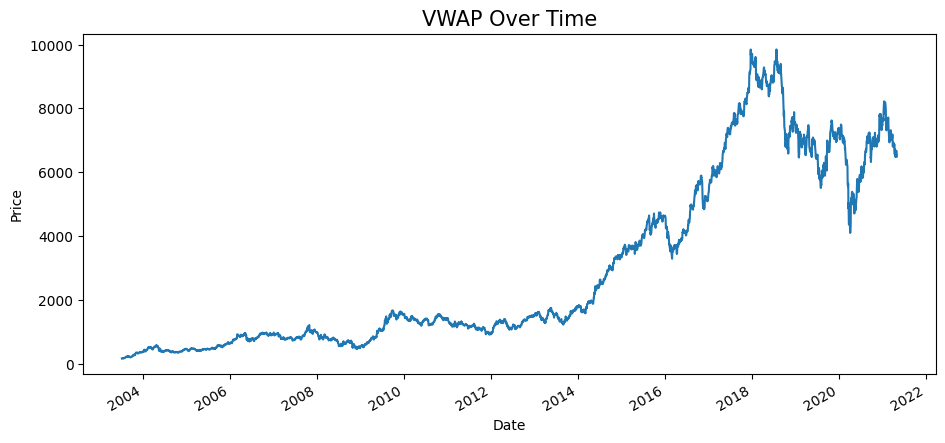

In [13]:
dataset_copy.VWAP.plot(figsize=(11, 5))
plt.title('VWAP Over Time', fontsize=15)
plt.ylabel('Price')

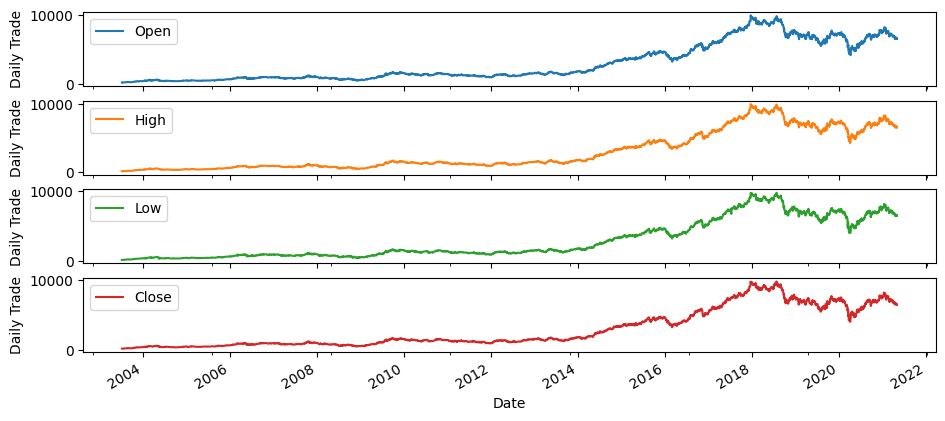

In [14]:
cols_plot = ['Open', 'High', 'Low', 'Close']
axes = dataset_copy[cols_plot].plot(figsize=(11,5), subplots=True)
for ax in axes :
  ax.set_ylabel('Daily Trade')


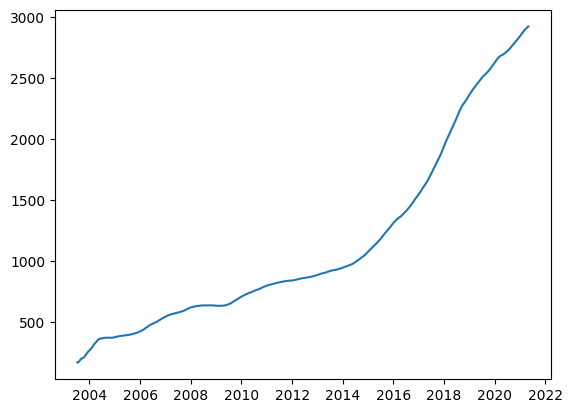

In [15]:
dataset_copy['Ex_mean_Close'] = dataset_copy['Close'].expanding(min_periods=3).mean()

plt.plot(dataset_copy.Date, dataset_copy.Ex_mean_Close)
plt.show()

In [16]:
dataset_copy.set_index(keys='Date', inplace=True)

In [17]:
dataset_copy.dropna(inplace=True)

In [18]:
dataset_copy.head()

,Prev Close,Open,High,Low,Close,VWAP,Month,Day,Ex_mean_Close
Date,,,,,,,,,
2003-07-11,167.00,167.75,174.85,166.25,173.35,172.45,7,11,168.216667
2003-07-14,173.35,174.25,179.25,174.25,177.95,177.91,7,14,170.650000
2003-07-15,177.95,200.00,200.00,173.00,176.20,176.88,7,15,171.760000
2003-07-16,176.20,176.45,179.10,175.35,177.10,177.59,7,16,172.650000
2003-07-17,177.10,177.50,178.00,170.65,172.20,175.48,7,17,172.585714


In [19]:
X = dataset_copy.drop(columns='Close').values
Y = dataset_copy['Close'].values

In [20]:
print(X)

[[1.67000000e+02 1.67750000e+02 1.74850000e+02 ... 7.00000000e+00
  1.10000000e+01 1.68216667e+02]
 [1.73350000e+02 1.74250000e+02 1.79250000e+02 ... 7.00000000e+00
  1.40000000e+01 1.70650000e+02]
 [1.77950000e+02 2.00000000e+02 2.00000000e+02 ... 7.00000000e+00
  1.50000000e+01 1.71760000e+02]
 ...
 [6.56875000e+03 6.56875000e+03 6.65000000e+03 ... 4.00000000e+00
  2.80000000e+01 2.92338446e+03]
 [6.57380000e+03 6.63500000e+03 6.64745000e+03 ... 4.00000000e+00
  2.90000000e+01 2.92420739e+03]
 [6.56565000e+03 6.53710000e+03 6.55960000e+03 ... 4.00000000e+00
  3.00000000e+01 2.92500509e+03]]


In [21]:
X.shape

(4425, 8)

In [22]:
Y.shape

(4425,)

In [24]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [25]:
X_robust_scaler = RobustScaler()
Y_robust_scaler = RobustScaler()

X = X_robust_scaler.fit_transform(X)
Y = Y_robust_scaler.fit_transform(Y.reshape(-1,1))

In [26]:
X_minmax_scaler = MinMaxScaler()
Y_minmax_scaler = MinMaxScaler()

X = X_minmax_scaler.fit_transform(X)
Y = Y_minmax_scaler.fit_transform(Y)

In [27]:
X_df = pd.DataFrame(X)
X_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/X.csv', index=False)

Y_df = pd.DataFrame(Y, columns=['Close'])
Y_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/Y.csv', index=False)

